In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#pd.set_option('display.max_colwidth', 200)
pd.options.display.max_colwidth = 200
pd.set_option('display.max_rows', 4000)
# all data scraped from https://www.politifact.com/

# Merge notebooks and create years column for internal use

In [ ]:
old = pd.read_csv("politifact_2019.csv", index_col=0)
new = pd.read_csv("politifact_2021.csv", index_col=0)
new = new.rename(columns={"year": "link"})
merged = pd.concat([old,new])
merged["year"] = merged.link.str.extract(r'(\d{4})').astype(int)

# Drop duplicate statements

In [ ]:
merged = merged.drop_duplicates(subset=['statement'])
merged.head()

,statement,source,link,veracity,year
0,"Says that in 1770 ""British parliament banned lipstick, saying it had the power to seduce men into marriage, which was classified as witchcraft.""",Facebook posts,/facebook-fact-checks/statements/2019/oct/25/facebook-posts/no-british-parliament-didnt-ban-witchcraft-lipstic/,Pants on Fire!,2019
1,"Says Ann Landers said, ""At age 20, we worry about what others think of us. At age 40, we don’t care what they think. At age 60, we discover that they have not been thinking of us at all.""",Viral image,/facebook-fact-checks/statements/2019/oct/25/viral-image/no-evidence-ann-landers-said-quote-about-age/,False,2019
2,"""General Motors is making record profits.""",Glenn Kage,/missouri/statements/2019/oct/25/glenn-kage/general-motors-profits-have-been-record-setting-no/,Half-True,2019
3,"""14,000 abandoned wind turbines litter the United States.""",Chain email,/missouri/statements/2019/oct/25/chain-email/no-there-arent-14000-abandoned-wind-turbines-litte/,Pants on Fire!,2019
4,"Says Congress gave Wall Street ""trillions of dollars of zero interest loans.""",Bernie Sanders,/truth-o-meter/statements/2019/oct/25/bernie-sanders/bernie-sanders-overstates-recession-aid-wall-stree/,Half-True,2019


# Dictionary mapping veracity to a a single structure

In [ ]:
dictionary = {'pants-fire'    : "pants-fire",
              'false'    : "false",
              'full-flop'    : "full-flop",
              'mostly-true'    : "mostly-true",
              'barely-true'    : "barely-true",
              'half-true'   : "half-true",
              'true'  : "true",
              'Pants on Fire!'    : "pants-fire",
              'False'    : "false",
              'Full Flop'    : "full-flop",
              'Mostly True'    : "mostly-true",
              'Half-True'   : "half-true",
              'True'  : "true",
              'Mostly False' : "mostly-false",
              'Half Flip' : 'half-flip',
              'No Flip' : 'no-flip'
            }

merged['renamed_veracity'] = merged['veracity'].apply(lambda x: dictionary[x])

In [ ]:
merged.renamed_veracity.value_counts()

false           3424
half-true       3196
mostly-true     3045
mostly-false    2755
true            2359
pants-fire      1895
full-flop        150
barely-true       76
half-flip         68
no-flip           26
Name: renamed_veracity, dtype: int64

In [ ]:
merged = merged.drop(merged[merged['renamed_veracity'].isin(['full-flop','half-flip','no-flip'])].index, axis=0)

In [ ]:
merged.renamed_veracity.value_counts()

false           3424
half-true       3196
mostly-true     3045
mostly-false    2755
true            2359
pants-fire      1895
barely-true       76
Name: renamed_veracity, dtype: int64

In [ ]:
merged[merged.statement.str.contains("\n")]

,statement,source,link,veracity,year,renamed_veracity
67,"""Republican policies have led to business investment growth that’s 10 times\nfaster than what we saw under President Obama.""",Ron Johnson,/wisconsin/statements/2019/oct/09/ron-johnson/wisconsin-gop-sen-ron-johnson-overreaches-economy-/,Mostly False,2019,mostly-false
479,"Republicans on the budget-writing committee ""did nothing"" to address oversight of\nlarge-scale farms, ""as literal manure is coming out of people’s faucets.",Jimmy Anderson,/wisconsin/statements/2019/jun/11/jimmy-anderson/state-lawmaker-goes-too-far-out-pasture-large-scal/,Half-True,2019,half-true
3510,"""Cost of iPhone: $399\n- Cost of healthcare for 1 year: $10,345\n- Hearing @jasoninthehouse compare the 2 as if they are the same: priceless""",Gavin Newsom,/california/statements/2017/mar/10/gavin-newsom/debate-over-iphone-vs-health-care-costs-gavin-news/,Mostly True,2017,mostly-true
6707,"""GEORGIA ROADWAY FATALITIES THIS YEAR: 59\nPLEASE DRIVE SAFELY""",Georgia Department of Transportation,/georgia/statements/2015/feb/02/billboard-spaghetti-junction/dot-sign-counts-roadway-deaths/,True,2015,true
6759,The state covered a smaller percentage of the cost of K-12 education in 2013 than it did\nin 2002.,Claire Suggs,/georgia/statements/2015/jan/20/claire-suggs/analyst-target-education-spending/,Mostly True,2015,mostly-true
9204,"Says \n""With nearly 75 percent of Americans supportive of the construction of the pipeline, Schrader needs to explain to Oregon families why he voted against this needed project.""",National Republican Congressional Committee,/oregon/statements/2013/jun/01/national-republican-congressional-committee/did-kurt-schrader-vote-against-widely-supported-ke/,Mostly True,2013,mostly-true
10478,"""Clayton County Public Schools recently achieved a milestone that has eluded other\nmetropolitan districts across the state"" by meeting federal guidelines for having a highly qualified staff.",Clayton County Schools,/georgia/statements/2012/aug/22/clayton-county-schools/clayton-schools-claim-high-status/,True,2012,true
12263,"Chris Christie has not been ""effective at creating jobs … (or have) a record of governing for effectiveness. ...\nNew Jersey (has) one of the higher unemployment rates in the country at 9.4 percent.""",Martin O'Malley,/truth-o-meter/statements/2011/oct/03/martin-omalley/under-chris-christie-does-new-jersey-have-one-high/,Half-True,2011,half-true
12279,"Says U.S. Sen Sherrod Brown ""promised that the first stimulus bill would fund the\nBrent Spence Bridge.""",Josh Mandel,/ohio/statements/2011/sep/30/josh-mandel/josh-mandel-says-sherrod-brown-promised-ohio-river/,Mostly False,2011,mostly-false
13615,"Says his state budget will ""provide an increase in state funding\nfor the 2011-12 school year.""",John Kitzhaber,/oregon/statements/2011/feb/02/john-kitzhaber/john-kitzhaber-says-proposed-budget-represents-inc/,Mostly True,2011,mostly-true


In [ ]:
# Clear '\n' format
merged['statement'] = merged['statement'].str.replace('\n',' ')

In [ ]:
merged["statement_mod"] = merged.statement.str.replace("Says", "")

In [ ]:
merged["statement_mod"] = merged.statement_mod.str.replace("Said", "")

In [ ]:
merged['statement_mod'] = merged.statement_mod.str.lstrip()

In [ ]:
# Words in paranthesis indicate context, might want to remove or keep during modeling

In [ ]:
merged.to_csv('cleaned_data.csv', index=False)

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [5]:
df['sent_length'] = df.statement.apply(lambda x: len(x.split(' ')))

count    16750.000000
mean        18.188478
std          7.974300
min          2.000000
25%         12.000000
50%         17.000000
75%         23.000000
max         73.000000
Name: sent_length, dtype: float64

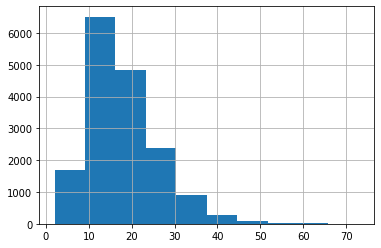

In [7]:
df.sent_length.hist()
df.sent_length.describe()

# use min of 10 word, use 25 words as max

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ba64113f-66c5-469d-aa9f-5432b65aa500' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>